# Airbnb Lisbon Data Analysis

This notebook will analyse public data from airbnb, obtained from http://insideairbnb.com/get-the-data.html. We will look at data from the capital city of Portugal which is Lisbon to try to answer the following questions:

###### Which neighbourhoods have the most listings, are more expensive and have the most positive reviews?

###### How much of an impact does being a super host make on review score, price and demand?

###### Can we offer a price suggestion for a new listing, based on its features and on the features of the most successful listings?



## Table of Contents:
* [Data Sneak Peek](#first-bullet)
* [Neighbourhoods Analysis](#second-bullet)
* [Price Prediction](#third-bullet)
    * [NaN values analysis](#fourth-bullet)

### Data Sneak Peek <a class="anchor" id="first-bullet"></a>

In [1]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Get the raw data from the csv file and take a peak
air_bnb_listings_raw = pd.read_csv('listings.csv')
air_bnb_listings_raw.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,24056,https://www.airbnb.com/rooms/24056,20181017033106,2018-10-17,Linda-a-Velha,NaN,A comfortable apartment with pool during the s...,A comfortable apartment with pool during the s...,none,NaN,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,NaN
1,25659,https://www.airbnb.com/rooms/25659,20181017033106,2018-10-17,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Sunny Charming 1 Bedroom apar...,Charming sunny apartment in the heart of Alfam...,Heart of Alfama! Sunny Charming 1 Bedroom apar...,none,Alfama is the oldest and most picturesque quar...,...,t,56539/AL.,"{Lisbon,"" Portugal""}",t,f,moderate,f,f,1,1.7


In [3]:
# Learn the shape of the dataset
print(f'This dataset has {air_bnb_listings_raw.shape[0]} rows and {air_bnb_listings_raw.shape[1]} columns')

# Get some basic information about each of the columns
air_bnb_listings_raw.describe()

This dataset has 22123 rows and 96 columns


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.212300e+04,2.212300e+04,0.0,0.0,0.0,2.212300e+04,0.0,22121.000000,22121.000000,22123.000000,...,22123.000000,18605.000000,18591.000000,18599.000000,18584.000000,18592.000000,18585.000000,18582.000000,22123.000000,18789.000000
mean,1.631487e+07,2.018102e+13,NaN,NaN,NaN,6.721255e+07,NaN,15.411916,15.411916,38.755540,...,33.259865,92.450954,9.527083,9.454756,9.655295,9.678410,9.393489,9.216769,12.259775,1.874947
std,8.490358e+06,2.425836e+00,NaN,NaN,NaN,6.551403e+07,NaN,50.192890,50.192890,0.103668,...,51.666962,8.275162,0.840736,0.867613,0.769299,0.742025,0.790379,0.880603,34.383392,1.695623
min,2.405600e+04,2.018102e+13,NaN,NaN,NaN,1.709600e+04,NaN,0.000000,0.000000,38.675089,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,9.251693e+06,2.018102e+13,NaN,NaN,NaN,1.192645e+07,NaN,1.000000,1.000000,38.711027,...,2.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,1.000000,0.520000
50%,1.795770e+07,2.018102e+13,NaN,NaN,NaN,4.070291e+07,NaN,3.000000,3.000000,38.717512,...,11.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,3.000000,1.370000
75%,2.360596e+07,2.018102e+13,NaN,NaN,NaN,1.167129e+08,NaN,10.000000,10.000000,38.739007,...,41.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,2.850000
max,2.933783e+07,2.018102e+13,NaN,NaN,NaN,2.210216e+08,NaN,422.000000,422.000000,39.301960,...,663.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,274.000000,19.860000


In [40]:
nr_listings_per_neighbourhood = air_bnb_listings_raw.groupby(['neighbourhood'])['id'].count()
nr_listings_per_neighbourhood.sort_values(ascending=False).head(10)

neighbourhood
Alfama                  1376
Baixa                    941
São Jorge de Arroios     815
Encarnação               770
Anjos                    725
Santa Catarina           683
São Paulo                679
Mercês                   588
Coração de Jesus         512
Pena                     475
Name: id, dtype: int64

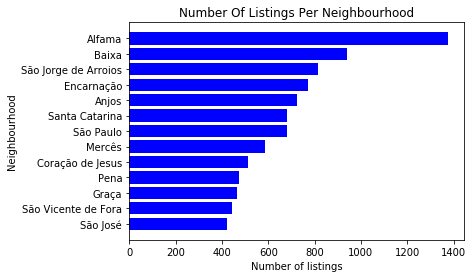

In [61]:
mask0 = nr_listings_per_neighbourhood > 400
nr_listings_per_neighbourhood_sorted = nr_listings_per_neighbourhood.sort_values()
plt.barh(nr_listings_per_neighbourhood_sorted[mask0].index, nr_listings_per_neighbourhood_sorted[mask0], color = 'blue')
plt.xlabel('Number of listings')
plt.ylabel('Neighbourhood')
plt.title('Number Of Listings Per Neighbourhood')
plt.show()
plt.close()

In [47]:
review_score_per_neighbourhood = air_bnb_listings_raw.groupby(['neighbourhood'])['review_scores_rating'].mean()         
review_score_per_neighbourhood.sort_values(ascending=False).head(10)

neighbourhood
Charneca                   98.250000
São João de Deus           94.170732
Santa Maria dos Olivais    94.144444
Ajuda                      93.730496
Estrella/Lapa              93.572000
Graça                      93.546988
Belém                      93.526690
São Mamede                 93.512635
São Domingos de Benfica    93.430108
Parque das Nações          93.308642
Name: review_scores_rating, dtype: float64

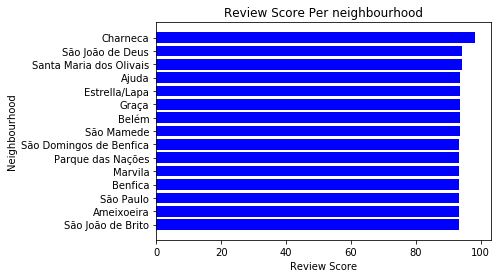

In [62]:
mask0 = review_score_per_neighbourhood > 93
review_score_per_neighbourhood_sorted = review_score_per_neighbourhood.sort_values()
plt.barh(review_score_per_neighbourhood_sorted[mask0].index,review_score_per_neighbourhood_sorted[mask0], color = 'blue')
plt.xlabel('Review Score')
plt.ylabel('Neighbourhood')
plt.title('Review Score Per neighbourhood')
plt.show()
plt.close()

In [29]:
def parse_into_float(price_string):
    return float(price_string[1:].replace(',', ''))

air_bnb_listings_raw['float_price'] = air_bnb_listings_raw['price'].apply(parse_into_float)

In [63]:
mean_prices_per_neibourhood = air_bnb_listings_raw.groupby(['neighbourhood'])['float_price'].mean()
mean_prices_per_neibourhood.sort_values(ascending=False).head(10)

neighbourhood
Bairro Alto                300.000000
Benfica                    210.588785
São Domingos de Benfica    197.346667
Carnide                    149.792683
Baixa                      114.463337
Parque das Nações          112.525806
Encarnação                 108.211688
Santa Isabel               107.295000
São Francisco Xavier       103.100000
Mercês                      98.015306
Name: float_price, dtype: float64

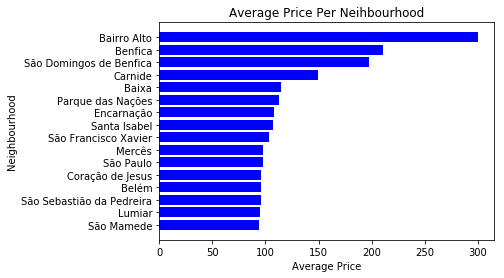

In [66]:
mean_prices_per_neibourhood_sorted = mean_prices_per_neibourhood.sort_values()
mask0 = mean_prices_per_neibourhood_sorted > 90
plt.barh(mean_prices_per_neibourhood_sorted[mask0].index,mean_prices_per_neibourhood_sorted[mask0], color = 'blue')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('Average Price Per Neihbourhood')
plt.show()
plt.close()

### Nan values analysis <a class="anchor" id="second-bullet"></a>

The dataset has a total of 29819 NaN values. We will classify any column with more than 60% NaN values an outlier column. By analysing the bar plot below, we can confirm that 60% appears to be the ideal threshold value. The columns with less than 5% NaN values were excluded from the bar plot.

In [11]:
print(f'The total number of nan values in this dataset is {air_bnb_listings_raw.isnull().sum().sum()}')
null_values_per_column = air_bnb_listings_raw.isnull().sum()/air_bnb_listings_raw.shape[0]
print(null_values_per_column.sort_values(ascending=False)[null_values_per_column > .6])

The total number of nan values in this dataset is 312368
xl_picture_url          1.000000
host_acceptance_rate    1.000000
medium_url              1.000000
thumbnail_url           1.000000
square_feet             0.979117
monthly_price           0.906884
weekly_price            0.895087
dtype: float64


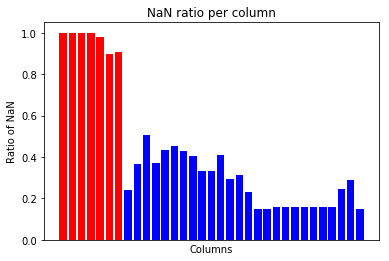

In [13]:
mask0 = null_values_per_column > 0.05
mask1 = null_values_per_column >= 0.6
mask2 = null_values_per_column < 0.6   

plt.bar(null_values_per_column[mask0][mask1].index.values, null_values_per_column[mask0][mask1].values, color = 'red')
plt.xticks([])
plt.bar(null_values_per_column[mask0][mask2].index.values, null_values_per_column[mask0][mask2].values, color = 'blue')
plt.xlabel('Columns')
plt.ylabel('Ratio of NaN')
plt.title('NaN ratio per column')
plt.show()
plt.close()